In [9]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'measurement variation')

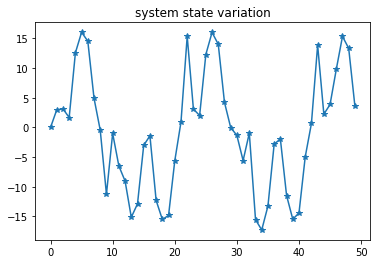

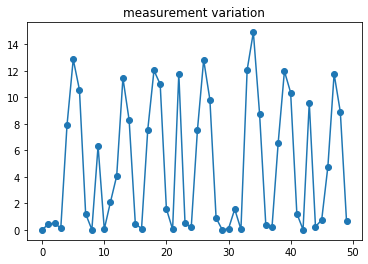

In [10]:
# Signal generation
N_length = 50 #signal length
Q = 0.01 #input('please input the process covariance')
R = 1e-4 #input('please input the measurement covariance')
x = np.zeros(N_length) # initialize x
y = np.zeros(N_length) # initialize y
for i in range(N_length-1):
    x[i+1] = 0.5*x[i] + (25*x[i])/(1+x[i]**2) + 8*np.cos(1.2*(i+1)) + np.sqrt(Q)*np.random.rand(1) 
    y[i] = x[i]**2/20 + np.sqrt(R)*np.random.rand(1) 
y[-1] = x[-1]**2/20 + np.sqrt(R)*np.random.rand(1) # last measurment element

plt.plot(np.arange(50), x, marker='*')
plt.title('system state variation')
plt.figure()
plt.plot(np.arange(50), y, marker ='o' )
plt.title('measurement variation')

In [11]:
#Extended Kalman Filter
def KF(y, Q, R):
    x_estimate = np.zeros(len(y))
    y_estimate = np.zeros(len(y))
    K = 0
    P_estimate = np.ones(len(y))*Q
    for i in range(len(x)-1):
        x_estimate[i+1] = 0.5*x_estimate[i] + (25*x_estimate[i])/(1+x_estimate[i]**2) + 8*np.cos(1.2*(i+1)) #one-step ahead state prediction
        y_estimate[i+1] = x_estimate[i+1]**2/20 #predicted measurement
        F = 0.5 + 25*(1-x_estimate[i+1]**2)/(1+x_estimate[i+1]**2)**2  #first-order derivative of state model
        H = x_estimate[i+1]/10 #first-order derivative of measurement model
        P_estimate[i+1] = F*P_estimate[i]*(F.T) + Q #variance associated the predicted state
        K = P_estimate[i+1]*H/(H*P_estimate[i+1]*H + R) #Kalman gain
        x_estimate[i+1] = x_estimate[i+1] + K*(y[i+1]-y_estimate[i+1]) #update of the predicted state
        P_estimate[i+1] = K*H*P_estimate[i+1] #update of the predicted state variance
    
    return x_estimate 

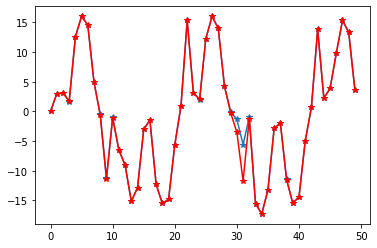

In [12]:
#tracking by Extended Kalman filter
x_estimate = KF(y, Q, R)
plt.plot(np.arange(50), x, marker='*')
plt.plot(np.arange(50), x_estimate, 'r',marker='*')